# DCGAN のトレーニング

## import packages

In [0]:
import numpy as np
import pathlib
import pickle

from matplotlib import pyplot as plt
from PIL import Image
from google.colab import drive

## DCGAN のコードを取得

In [0]:
!git clone -b feat/icons https://github.com/iimuz/dcgan.git
%cd dcgan

Cloning into 'dcgan'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 66 (delta 30), reused 49 (delta 18), pack-reused 0
Unpacking objects: 100% (66/66), done.
/content/dcgan


## データ退避先の google drive をマウント

Google drive のパスにスペースが含まれており、後段で取り回しにくいので symlink で対応します。
以降では `LOG_DIR` にファイルが出力されます。

In [0]:
GDRIVE_DIR = pathlib.Path('/content/drive/My Drive/dcgan')
LOG_DIR = pathlib.Path('logs')


def mount_gdrive(gdrive: pathlib.Path) -> None:
    if gdrive.exists() == False:
        drive.mount('/content/drive')
        !ln -s "$GDRIVE_DIR" $LOG_DIR

    !mkdir -p "$gdrive"


mount_gdrive(GDRIVE_DIR)

## トレーニングの実行

In [0]:
%run -i download_icons.py --full

parameters: Namespace(is_full=True, is_sample=False)
download from https://data.vision.ee.ethz.ch/sagea/lld/data/LLD-icon_full_data_PNG.zip to data/LLD-icon_full_data_PNG.zip
expand data from data/LLD-icon_full_data_PNG.zip to data/icons


In [5]:
NUM_EPOCH = 150

%run -i train.py \
    --batch_size 128 \
    --learning_rate 2e-6 \
    --epochs $NUM_EPOCH \
    --z_dim 62 \
    --checkpoint_each 10 \
    --checkpoint_images 64 \
    --log_dir "$LOG_DIR" \
    --cuda

parameters: Namespace(batch_size=128, checkpoint_each=10, checkpoint_images=64, is_cuda=True, learning_rate=2e-06, log_dir=PosixPath('logs'), num_epoch=150, z_dim=62)
cuda state: True


epoch 149, d_loss: 0.002223, g_loss: 0.02018: 100%|██████████| 150/150 [11:26:44<00:00, 274.89s/it]


## ログデータの表示

### Generator と Discriminator の loss プロット

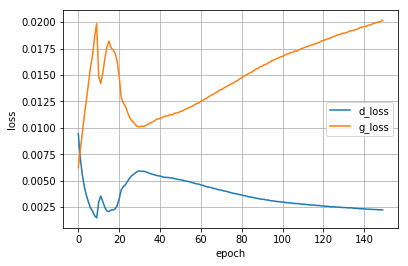

In [6]:
def plot_loss(log_dir: pathlib.Path):
    with open(log_dir.joinpath('history.pkl'), 'rb') as f:
        history = pickle.load(f)

    d_loss = [val['d_loss'] for val in history]
    g_loss = [val['g_loss'] for val in history]
    plt.plot(d_loss, label='d_loss')
    plt.plot(g_loss, label='g_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid()


plot_loss(log_dir=LOG_DIR)

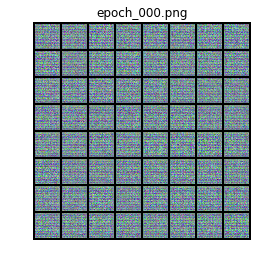

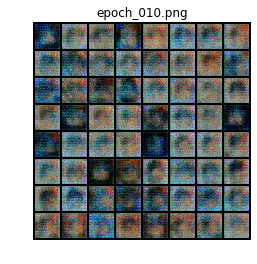

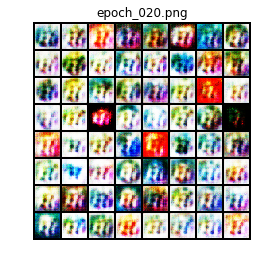

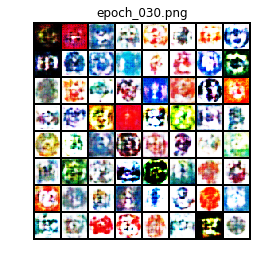

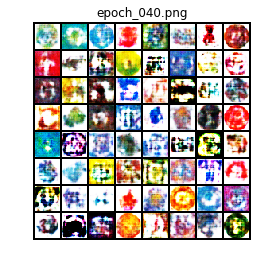

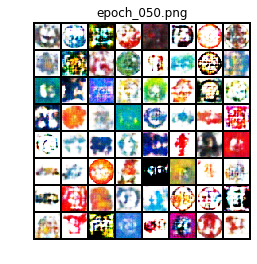

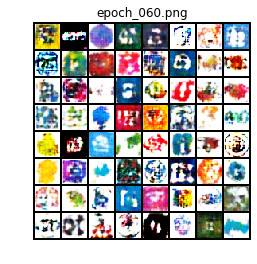

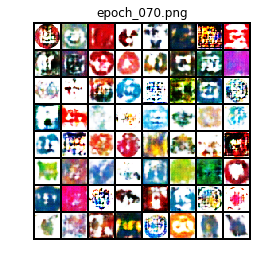

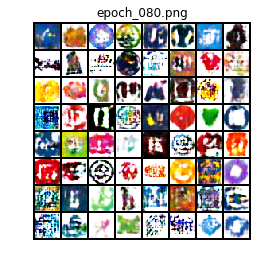

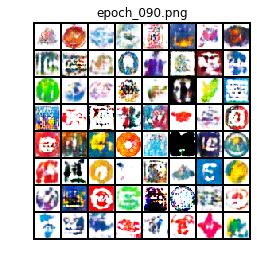

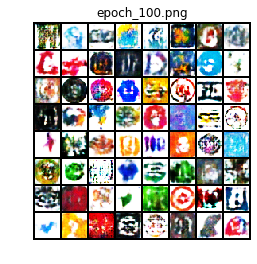

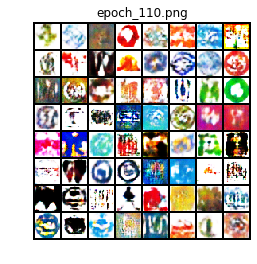

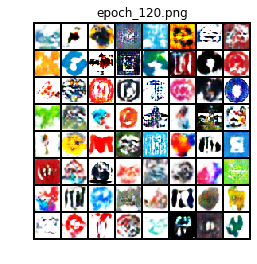

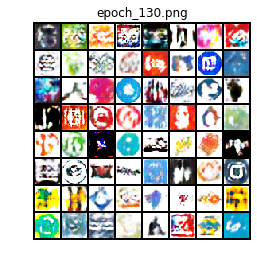

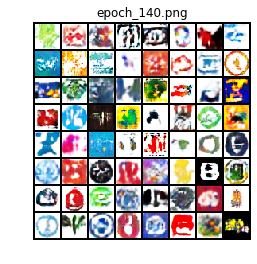

In [7]:
def show_checkpoint_images(log_dir: pathlib.Path) -> None:
    files = log_dir.glob('epoch_*.png')
    for file in files:
        plt.axis('off')
        plt.imshow(np.array(Image.open(file)))
        plt.title(str(file.name))
        plt.show()


show_checkpoint_images(log_dir=LOG_DIR)